Linear Regression for Description Dataset, against Human Ground Truth
=======================================

In [7]:
%matplotlib inline

import scipy.io as sio
import numpy as np
from glob import glob
import csv
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Load ground truth
groundTruthFile = 'largeSimMatrix.mat'
groundTruth = sio.loadmat(groundTruthFile)['largeSimMatrix']
groundTruth = 1.0 - groundTruth
print 'ground truth', groundTruth.shape
print

# Load similarity matrix
simMtxFileLst = sorted(glob('*_sim.csv'))
simMtx = {f.split('.')[0]:np.loadtxt(f, delimiter=',') for f in simMtxFileLst}
simMtxTypes = sorted(simMtx.keys())
print simMtxTypes
for name in simMtxTypes:
    print name, simMtx[name].shape

# Load category names
catNameFile = 'categoryKey.csv'
catName = {}
with open(catNameFile) as fin:
    r = csv.reader(fin)
    for row in r:
        catName[int(row[0])] = row[1]
catList = sorted(catName.keys())

ground truth (1055, 1055)

['angular_sim', 'cosine_sim', 'innerProd_sim', 'jsd_sim', 'l1_sim', 'l2_sim']
angular_sim (1055, 1055)
cosine_sim (1055, 1055)
innerProd_sim (1055, 1055)
jsd_sim (1055, 1055)
l1_sim (1055, 1055)
l2_sim (1055, 1055)


In [3]:
def stat_simMtx(mtx, printNum=10):
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(1,1,1)
    simMap = ax.pcolormesh(mtx)
    ax.autoscale(tight=True)
    ax.set_frame_on(False)
    ax.axis('off')
    cbar = fig.colorbar(simMap, ax=ax)
    plt.show()

    values = np.concatenate(mtx)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    n, bins, patches = ax.hist(values, 50)
    ax.set_yscale('log')
    plt.show()
    
    entries = []
    for x in xrange(len(catName)):
        for y in xrange(x):
            entries.append((x, y, mtx[x, y]))
    entries.sort(key=lambda x: x[2])
    
    print 'Smallest pairs:'
    for x, y, v in entries[:printNum]:
        print catName[catList[x]], '&' , catName[catList[y]], '-->', v
    print

    print 'Biggest pairs:'
    for x, y, v in entries[-printNum:]:
        print catName[catList[x]], '&' , catName[catList[y]], '-->', v

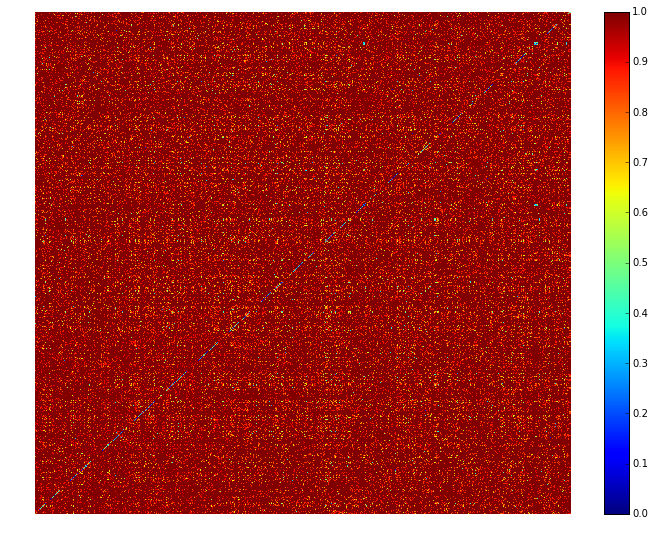

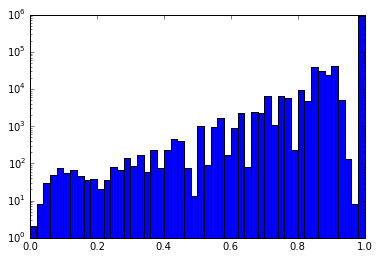

Smallest pairs:
soccer stadium & soccer --> 0.0
pitcher's mound & batting cage (outdoor) --> 0.0833333333333
stilt house water & pier --> 0.0909090909091
swimming hole & bayou --> 0.0909090909091
waterfall (cascade) & waterfall --> 0.0909090909091
soccer field & athletic field --> 0.111111111111
herb garden & greenhouse --> 0.125
rolling mil & pump room --> 0.125
shooting lodge & schoolhouse --> 0.125
underwater kelp forest & kelp forest --> 0.125

Biggest pairs:
zoo & winery --> 1.0
zoo & witness stand --> 1.0
zoo & woodshed --> 1.0
zoo & workroom --> 1.0
zoo & workshop --> 1.0
zoo & wreck --> 1.0
zoo & wrestling ring --> 1.0
zoo & yard --> 1.0
zoo & youth hostel --> 1.0
zoo & ziggurat --> 1.0


In [4]:
stat_simMtx(groundTruth)

In [9]:
def linRegUpperMtx(mtx1, mtx2): # mtx2 is target value
    if len(mtx1.shape) != 2 or mtx1.shape[0] != mtx1.shape[1]:
        raise RuntimeError('Matrix shape is not recognized!')
    if mtx1.shape != mtx2.shape:
        raise RuntimeError('Matrix shape does not match!')
    tmp = np.ones(mtx1.shape)
    indices = np.triu(tmp).nonzero()
    vec1 = mtx1[indices]
    vec2 = mtx2[indices]
    slope, intercept, r_value, p_value, std_err = stats.linregress(vec1, vec2)
    return r_value, std_err

def batchCompare(simMtxSet, groundTruthMtx):
    headers = ['Similarity Matrix Type', 'R^2 value', 'STD error']
    print '\t'.join(headers)
    for t in sorted(simMtxSet.keys()):
        content = [t]
        r_val, std_err = linRegUpperMtx(simMtxSet[t], groundTruthMtx)
        content.append(str(r_val * r_val))
        content.append(str(std_err))
        print '\t'.join(content)

In [10]:
batchCompare(simMtx, groundTruth)

Similarity Matrix Type	R^2 value	STD error
angular_sim	0.321467620194	0.000595511811018
cosine_sim	0.28427748309	0.000461287692652
innerProd_sim	0.317779729304	0.00373457997812
jsd_sim	0.276624918432	0.000863490387616
l1_sim	0.323453686575	0.000366199382145
l2_sim	0.033075150118	0.000820474894738
